In [1]:
# Number of data points to plot
num_points = 20

# Parameter ranges below
gc_actual = 0.1
# gc = 0 will lead to singular matrix during V_th computation, so don't set to 0.
gc_lo = 0.05
gc_hi = 0.5

ggap_actual = 1.0
ggap_lo = 0
ggap_hi = 1.5

gsyn_actual = 1.0
gsyn_lo = 0
gsyn_hi = 1.5

C_actual = 0.015

In [2]:
import numpy as np
import pandas as pd
import time
from neural_model import NeuralModel
from simulation_functions import *
from sklearn.decomposition import PCA
from util.analysis_util import *
from util.neuron_metadata import *
from util.plot_util import *

def gen_simulation_data(param_lo, param_hi, param_to_full_param_fcn, num_points):
  param_vals = []
  dom_amplitude_vals = []
  dom_amplitude_convergence_vals = []
  dom_period_vals = []
  dimensionality_vals = []

  i = 0
  for param in np.linspace(param_lo, param_hi, num_points):
    i += 1
    start_time = time.time()
    param_vec = param_to_full_param_fcn(param)
    fwd_dynamics = simulate_until_stable(
      C = param_vec['C'], Gc = param_vec['Gc'], ggap = param_vec['ggap'], gsyn = param_vec['gsyn'])
    elapsed_time = time.time() - start_time
    print("Iteration {0}/{1} took {2:.2f}s".format(i, num_points, elapsed_time))

    n = fwd_dynamics.shape[0]
    X = fwd_dynamics - fwd_dynamics.mean(axis = 0)
    pca = PCA()
    projected_X = pca.fit_transform(fwd_dynamics)
    dom_mode = projected_X[:,0]
    dom_amplitude = get_amplitude(dom_mode)
    dom_amplitude_convergence = get_amplitude_convergence(dom_mode)
    dom_period = get_period(dom_mode)
    eigen_vals = get_eigenvalues_from_pca(pca, n)
    dimensionality = get_dimensionality(eigen_vals)

    param_vals.append(param)
    dom_amplitude_vals.append(dom_amplitude)
    dom_amplitude_convergence_vals.append(dom_amplitude_convergence)
    dom_period_vals.append(dom_period)
    dimensionality_vals.append(dimensionality)
  return (param_vals, dom_amplitude_vals, dom_amplitude_convergence_vals, dom_period_vals, dimensionality_vals)

def plot_simulation_results(param_vals, dom_amplitude_vals,
                            dom_amplitude_convergence_vals, dom_period_vals, dimensionality_vals):
  fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
  ax = axes[0]
  ax.scatter(param_vals, dom_amplitude_vals)
  ax.set_title("Dom amplitude")
  ax = axes[1]
  ax.scatter(param_vals, dom_amplitude_convergence_vals)
  ax.set_title("Dom amplitude convergence")
  ax = axes[2]
  ax.scatter(param_vals, dom_period_vals)
  ax.set_title("Dom period")
  ax = axes[3]
  ax.scatter(param_vals, dimensionality_vals)
  ax.set_title("Dimensionality")
  return fig

# Gc tweaks

Simulation length 1000.00, convergence 37.61, amplitude 4698.95
Simulation length 2000.00, convergence 0.01, amplitude 280.47
Iteration 1/20 took 3.08s
Simulation length 1000.00, convergence 41.36, amplitude 4583.59
Simulation length 2000.00, convergence 0.00, amplitude 258.72
Iteration 2/20 took 3.20s
Simulation length 1000.00, convergence 44.64, amplitude 4467.15
Simulation length 2000.00, convergence 0.01, amplitude 237.09
Iteration 3/20 took 3.26s
Simulation length 1000.00, convergence 47.20, amplitude 4356.22
Simulation length 2000.00, convergence 0.01, amplitude 217.92
Iteration 4/20 took 3.12s
Simulation length 1000.00, convergence 49.70, amplitude 4251.17
Simulation length 2000.00, convergence 0.00, amplitude 200.69
Iteration 5/20 took 2.63s
Simulation length 1000.00, convergence 52.41, amplitude 4151.36
Simulation length 2000.00, convergence 0.00, amplitude 184.33
Iteration 6/20 took 3.59s
Simulation length 1000.00, convergence 55.52, amplitude 4063.84
Simulation length 2000.0

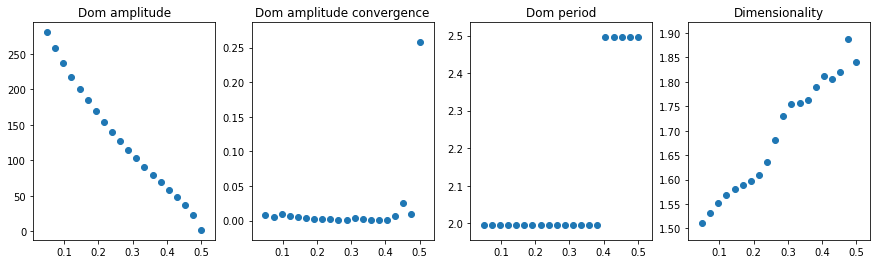

In [3]:
def gc_to_full_param(gc):
  return {
    'C': C_actual,
    'Gc': gc,
    'ggap': ggap_actual,
    'gsyn': gsyn_actual
  }

fig = plot_simulation_results(*gen_simulation_data(gc_lo, gc_hi, gc_to_full_param, num_points))

# Ggap tweaks

Simulation length 1000.00, convergence 15877.91, amplitude 997.87
Simulation length 2000.00, convergence 1.15, amplitude 0.50
Simulation length 4000.00, convergence 0.25, amplitude 0.02
Iteration 1/20 took 2.25s
Simulation length 1000.00, convergence 54.05, amplitude 3158.48
Simulation length 2000.00, convergence 0.00, amplitude 370.79
Iteration 2/20 took 2.85s
Simulation length 1000.00, convergence 1287.47, amplitude 3425.09
Simulation length 2000.00, convergence 1.02, amplitude 0.80
Simulation length 4000.00, convergence 0.00, amplitude 0.00
Iteration 3/20 took 3.12s
Simulation length 1000.00, convergence 24505.16, amplitude 3671.03
Simulation length 2000.00, convergence 0.57, amplitude 0.01
Iteration 4/20 took 1.53s
Simulation length 1000.00, convergence 1466.36, amplitude 3911.72
Simulation length 2000.00, convergence 6.62, amplitude 0.57
Simulation length 4000.00, convergence 0.30, amplitude 0.04
Iteration 5/20 took 2.50s
Simulation length 1000.00, convergence 59.15, amplitude 409

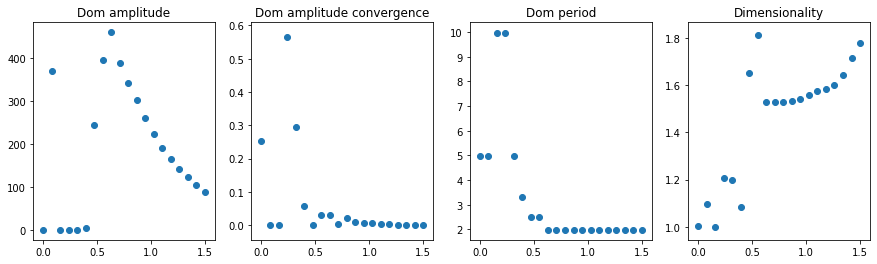

In [4]:
def ggap_to_full_param(ggap):
  return {
    'C': C_actual,
    'Gc': gc_actual,
    'ggap': ggap,
    'gsyn': gsyn_actual
  }

fig = plot_simulation_results(*gen_simulation_data(ggap_lo, ggap_hi, ggap_to_full_param, num_points))

# Gsyn tweaks

Simulation length 1000.00, convergence 2927692.45, amplitude 7898.03
Simulation length 2000.00, convergence 2.51, amplitude 0.01
Iteration 1/20 took 1.55s
Simulation length 1000.00, convergence 9772.37, amplitude 12510.75
Simulation length 2000.00, convergence 1.37, amplitude 0.13
Simulation length 4000.00, convergence 12.13, amplitude 0.00
Iteration 2/20 took 9.49s
Simulation length 1000.00, convergence 93066.54, amplitude 11209.18
Simulation length 2000.00, convergence 5.51, amplitude 0.01
Iteration 3/20 took 2.28s
Simulation length 1000.00, convergence 33223.28, amplitude 9877.04
Simulation length 2000.00, convergence 3.54, amplitude 0.02
Iteration 4/20 took 2.44s
Simulation length 1000.00, convergence 23919.88, amplitude 8775.16
Simulation length 2000.00, convergence 22.07, amplitude 0.01
Iteration 5/20 took 2.39s
Simulation length 1000.00, convergence 22032.33, amplitude 7851.82
Simulation length 2000.00, convergence 10.02, amplitude 0.01
Iteration 6/20 took 7.90s
Simulation lengt

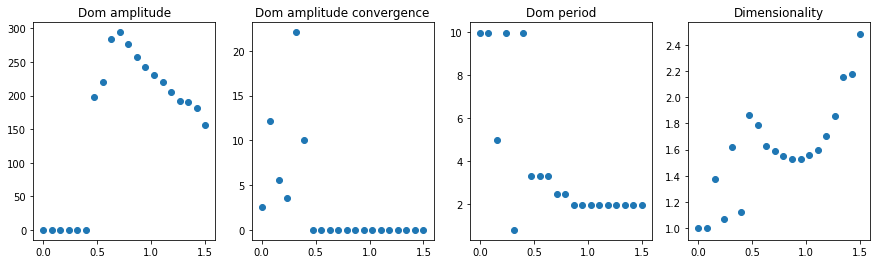

In [6]:
def gsyn_to_full_param(gsyn):
  return {
    'C': C_actual,
    'Gc': gc_actual,
    'ggap': ggap_actual,
    'gsyn': gsyn
  }

fig = plot_simulation_results(*gen_simulation_data(gsyn_lo, gsyn_hi, gsyn_to_full_param, num_points))